In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopandas as gpd

In [3]:
# Shapefile 읽기
shapefile_path = '/content/drive/MyDrive/유성구 데이터/법정동인구수경계/bnd_oa_25040_2023_2Q.shp'
gdf = gpd.read_file(shapefile_path)

# 좌표계 확인
print(gdf.crs)

# 좌표계가 EPSG:4326이 아니라면 변환
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')

PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 2000",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5179"]]


In [4]:
gdf

,BASE_DATE,ADM_CD,TOT_REG_CD,geometry
0,20230701,25040550,25040550050001,"POLYGON ((127.37222 36.43439, 127.37260 36.433..."
1,20230701,25040570,25040570010007,"POLYGON ((127.39111 36.41113, 127.39127 36.411..."
2,20230701,25040610,25040610010001,"POLYGON ((127.36809 36.46520, 127.36873 36.464..."
3,20230701,25040690,25040690050001,"POLYGON ((127.29333 36.34584, 127.29386 36.345..."
4,20230701,25040590,25040590070006,"POLYGON ((127.32107 36.37093, 127.32107 36.370..."
...,...,...,...,...
730,20230701,25040710,25040710040004,"POLYGON ((127.34023 36.33521, 127.34023 36.335..."
731,20230701,25040710,25040710040005,"POLYGON ((127.33940 36.33616, 127.33940 36.336..."
732,20230701,25040710,25040710040106,"POLYGON ((127.34465 36.33224, 127.34465 36.332..."
733,20230701,25040540,25040540090009,"POLYGON ((127.34357 36.37750, 127.34415 36.377..."


In [ ]:
jeon_gdf = gdf[gdf['ADM_CD']=='25040570']

In [ ]:
jeon_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)

<ipython-input-6-2b0336e58ead>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jeon_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)


In [ ]:
jeon_gdf['집계구번호'] = jeon_gdf['집계구번호'].astype(int)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
jeon_df = pd.read_excel('/content/drive/MyDrive/유성구 데이터/전민동_인구분포.xls')
jeon_df

,순위,항목,집계구번호,값,비율(%)
0,1,전민동_1,25040570010205,654,2.5
1,2,전민동_2,25040570010501,628,2.4
2,3,전민동_3,25040570010213,625,2.4
3,4,전민동_4,25040570010505,624,2.4
4,5,전민동_5,25040570010212,602,2.3
5,6,전민동_6,25040570010402,590,2.3
6,7,전민동_7,25040570010221,581,2.3
7,8,전민동_8,25040570010010,574,2.2
8,9,전민동_9,25040570010104,568,2.2
9,10,전민동_10,25040570010201,565,2.2


In [ ]:
jeon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      53 non-null     int64  
 1   항목      53 non-null     object 
 2   집계구번호   53 non-null     int64  
 3   값       53 non-null     int64  
 4   비율(%)   53 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ KB


In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
# prompt: sdp_df의 집계구번호 기준 오름차순 정렬

jeon_df = jeon_df.sort_values('집계구번호')
jeon_df

,순위,항목,집계구번호,값,비율(%)
21,22,전민동_22,25040570010001,494,1.90000
26,27,전민동_27,25040570010002,473,1.80000
35,36,전민동_36,25040570010003,434,1.70000
25,26,전민동_26,25040570010004,477,1.80000
36,37,전민동_37,25040570010005,434,1.70000
32,33,전민동_33,25040570010006,447,1.70000
23,24,전민동_24,25040570010007,492,1.90000
18,19,전민동_19,25040570010008,517,2.00000
39,40,전민동_40,25040570010009,424,1.60000
7,8,전민동_8,25040570010010,574,2.20000


In [ ]:
jeon_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 53 entries, 1 to 209
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   BASE_DATE  53 non-null     object  
 1   ADM_CD     53 non-null     object  
 2   집계구번호      53 non-null     int64   
 3   geometry   53 non-null     geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 2.1+ KB


In [ ]:
# '집계구번호' 열을 기준으로 병합
jeon_new_gdf = jeon_gdf.merge(jeon_df[['집계구번호', '값', '비율(%)']], on='집계구번호', how='left')
jeon_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040570,25040570010007,"POLYGON ((127.39111 36.41113, 127.39127 36.411...",492,1.90000
1,20230701,25040570,25040570010102,"POLYGON ((127.40490 36.40007, 127.40376 36.400...",493,1.90000
2,20230701,25040570,25040570010105,"POLYGON ((127.40222 36.40099, 127.40222 36.400...",447,1.70000
3,20230701,25040570,25040570010215,"POLYGON ((127.41001 36.40216, 127.41006 36.402...",557,2.20000
4,20230701,25040570,25040570010104,"POLYGON ((127.40376 36.40060, 127.40376 36.400...",568,2.20000
5,20230701,25040570,25040570010214,"POLYGON ((127.40620 36.39710, 127.40620 36.396...",417,1.60000
6,20230701,25040570,25040570010101,"POLYGON ((127.40134 36.40066, 127.40134 36.400...",462,1.80000
7,20230701,25040570,25040570010222,"POLYGON ((127.40910 36.39916, 127.40910 36.398...",530,2.10000
8,20230701,25040570,25040570010211,"POLYGON ((127.41023 36.39851, 127.40910 36.398...",540,2.10000
9,20230701,25040570,25040570010210,"POLYGON ((127.40688 36.39784, 127.40688 36.397...",515,2.00000


In [ ]:
jeon_new_gdf['일별쓰레기배출량'] = jeon_new_gdf['값'] * 0.93
jeon_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040570,25040570010007,"POLYGON ((127.39111 36.41113, 127.39127 36.411...",492,1.90000,457.56000
1,20230701,25040570,25040570010102,"POLYGON ((127.40490 36.40007, 127.40376 36.400...",493,1.90000,458.49000
2,20230701,25040570,25040570010105,"POLYGON ((127.40222 36.40099, 127.40222 36.400...",447,1.70000,415.71000
3,20230701,25040570,25040570010215,"POLYGON ((127.41001 36.40216, 127.41006 36.402...",557,2.20000,518.01000
4,20230701,25040570,25040570010104,"POLYGON ((127.40376 36.40060, 127.40376 36.400...",568,2.20000,528.24000
5,20230701,25040570,25040570010214,"POLYGON ((127.40620 36.39710, 127.40620 36.396...",417,1.60000,387.81000
6,20230701,25040570,25040570010101,"POLYGON ((127.40134 36.40066, 127.40134 36.400...",462,1.80000,429.66000
7,20230701,25040570,25040570010222,"POLYGON ((127.40910 36.39916, 127.40910 36.398...",530,2.10000,492.90000
8,20230701,25040570,25040570010211,"POLYGON ((127.41023 36.39851, 127.40910 36.398...",540,2.10000,502.20000
9,20230701,25040570,25040570010210,"POLYGON ((127.40688 36.39784, 127.40688 36.397...",515,2.00000,478.95000


In [ ]:
# 문자열 리스트 생성
code_list = [
    "10006", "10002", "10401", "10403", "10402", "10003", "10101", "10105", "10302", "10301",
    "10304", "10305", "10103", "10104", "10102", "10303", "10217", "10206", "10205", "10203",
    "10220", "10219", "10215", "10207", "10204", "10212", "10201", "10222", "10211",
    "10209", "10221", "10210", "10216", "10214", "10213",
    "10008", "10010", "10005", "10208", "10202", "10218", "10004"
]

new_codes = []
for code in code_list:
  new_code = int("250405700" + code)
  new_codes.append(new_code)
print(new_codes)

[25040570010006, 25040570010002, 25040570010401, 25040570010403, 25040570010402, 25040570010003, 25040570010101, 25040570010105, 25040570010302, 25040570010301, 25040570010304, 25040570010305, 25040570010103, 25040570010104, 25040570010102, 25040570010303, 25040570010217, 25040570010206, 25040570010205, 25040570010203, 25040570010220, 25040570010219, 25040570010215, 25040570010207, 25040570010204, 25040570010212, 25040570010201, 25040570010222, 25040570010211, 25040570010209, 25040570010221, 25040570010210, 25040570010216, 25040570010214, 25040570010213, 25040570010008, 25040570010010, 25040570010005, 25040570010208, 25040570010202, 25040570010218, 25040570010004]


In [ ]:
jeon_final_gdf = jeon_new_gdf[jeon_new_gdf['집계구번호'].isin(new_codes)]
jeon_final_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
1,20230701,25040570,25040570010102,"POLYGON ((127.40490 36.40007, 127.40376 36.400...",493,1.90000,458.49000
2,20230701,25040570,25040570010105,"POLYGON ((127.40222 36.40099, 127.40222 36.400...",447,1.70000,415.71000
3,20230701,25040570,25040570010215,"POLYGON ((127.41001 36.40216, 127.41006 36.402...",557,2.20000,518.01000
4,20230701,25040570,25040570010104,"POLYGON ((127.40376 36.40060, 127.40376 36.400...",568,2.20000,528.24000
5,20230701,25040570,25040570010214,"POLYGON ((127.40620 36.39710, 127.40620 36.396...",417,1.60000,387.81000
6,20230701,25040570,25040570010101,"POLYGON ((127.40134 36.40066, 127.40134 36.400...",462,1.80000,429.66000
7,20230701,25040570,25040570010222,"POLYGON ((127.40910 36.39916, 127.40910 36.398...",530,2.10000,492.90000
8,20230701,25040570,25040570010211,"POLYGON ((127.41023 36.39851, 127.40910 36.398...",540,2.10000,502.20000
9,20230701,25040570,25040570010210,"POLYGON ((127.40688 36.39784, 127.40688 36.397...",515,2.00000,478.95000
10,20230701,25040570,25040570010213,"POLYGON ((127.40867 36.39716, 127.40904 36.396...",625,2.40000,581.25000


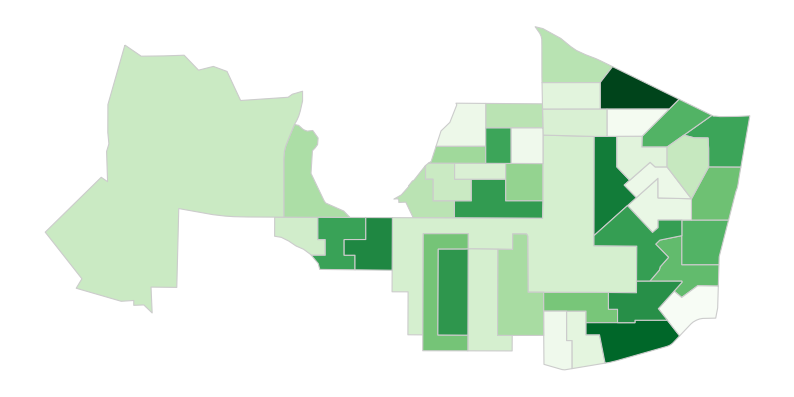

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

variable = '일별쓰레기배출량'

# 범위 설정
vmin, vmax = jeon_final_gdf[variable].min(), jeon_final_gdf[variable].max()

# Plot 생성
fig, ax = plt.subplots(1, figsize=(10, 6))

# GeoDataFrame을 시각화, legend=False로 기본 범례 제거
jeon_final_gdf.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, alpha=1)

# 축 제거
ax.axis('off')

# 지도 저장
plt.savefig("/content/drive/MyDrive/시각화파일/jeonmin_block.png", dpi=800, bbox_inches='tight', pad_inches=0)

# 지도 출력
plt.show()

In [ ]:
# CSV 파일 경로
file_path_ = '/content/drive/MyDrive/유성구 데이터/유성구_공동주택_현황_위경도.csv'

# CSV 파일 읽기
apart_df = pd.read_csv(file_path_)

# 데이터프레임 확인
apart_df

,NAME,ADDRESS,_X,_Y
0,원자력연료사원아파트,대전광역시 유성구 도룡동 392-2,127.37591,36.38413
1,우성아파트,대전광역시 유성구 도룡동 383-3,127.38112,36.38818
2,연구원 현대아파트,대전광역시 유성구 도룡동 431-6,127.37672,36.38301
3,과기원교수아파트,대전광역시 유성구 도룡동 383-2,127.38033,36.38810
4,삼정하이츠아파트,대전광역시 유성구 구암동 600-2,127.33172,36.35342
...,...,...,...,...
244,호반써밋유성그랜드파크1단지,대전광역시 유성구 용산동 371-4,127.39104,36.41698
245,호반써밋유성그랜드파크3단지,대전광역시 유성구 용산동 391-2,127.39564,36.41369
246,원플러스(One Plus),대전광역시 유성구 봉명동 666-3,127.35198,36.35838
247,크레타하임,대전광역시 유성구 도룡동 385-21,127.37968,36.38581


In [ ]:
# 'ADDRESS' 열에 '관평동'이 포함된 행만 필터링합니다.
jeonmin_apart_df = apart_df[apart_df['ADDRESS'].str.contains('전민동')]

# 필터링된 데이터프레임을 새로운 변수에 저장합니다.
jeonmin_apart_df

,NAME,ADDRESS,_X,_Y
10,삼성푸른아파트,대전광역시 유성구 전민동 460-1,127.39878,36.39902
12,엑스포아파트,대전광역시 유성구 전민동 464-1,127.40848,36.39986
14,세종아파트,대전광역시 유성구 전민동 462-5,127.40270,36.40032
17,나래아파트,대전광역시 유성구 전민동 462-4,127.40325,36.40172


In [ ]:
import folium
from folium import Choropleth, LayerControl, GeoJson
import pandas as pd
import geopandas as gpd

# 법정동별 상권 수 집계

# 지도 중심부 설정 (대전 유성구)
center = [36.3668, 127.3451]

# 기본 지도 생성
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Choropleth 레이어 추가
Choropleth(
    geo_data=jeon_final_gdf.to_json(),
    data=jeon_final_gdf,
    columns=['집계구번호', '일별쓰레기배출량'],
    key_on='feature.properties.집계구번호',
    fill_color='Greens',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='값',

).add_to(m)

for _, row in jeonmin_apart_df.iterrows():
    folium.Circle(
        location=[row['_Y'], row['_X']],
        radius=100,  # 반경 설정 (미터 단위)
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        tooltip=f"주소: {row['ADDRESS']}"  # 마커에 표시될 툴팁
    ).add_to(m)

# 레이어 컨트롤 추가
LayerControl().add_to(m)

# 지도 저장 및 출력
m.save('/content/drive/MyDrive/시각화파일/html법정동별 지도/jeonmin_block1.html')
m